Exploring different embedding datasets already open-sourced

In [3]:
import os 
import geopandas as gpd

Clay has provided two embedding datasets: Clayv0 embeddings of their v0 training images [link](https://source.coop/repositories/brunosan/clay-model-v0-embeddings/description), and Clay v1.5 embeddings of all of AWS on NAIP [link](https://source.coop/repositories/clay/clay-v1-5-naip-2/description)

Looking at v0 training chip embeddings first

In [5]:
v0dir = 'clay/v0_training_chips/'
cv0_files = os.listdir(v0dir)
print(cv0_files)
cv0 = gpd.read_parquet(os.path.join(v0dir,cv0_files[0]))
cv0.head()

['01WCN_20190518_20231021_v001.gpq']


,index,source_url,date,embeddings,geometry
0,0,s3://clay-tiles-02/02/01WCN/2019-05-18/claytil...,2019-05-18,"[-9.3011477e-07, 0.016794527, -0.00038003526, ...","POLYGON ((15.11128 65.77562, 15.11148 65.82156..."
1,1,s3://clay-tiles-02/02/01WCN/2019-05-18/claytil...,2019-05-18,"[0.0010566132, 0.015716689, -0.0017135916, 0.0...","POLYGON ((15.22311 65.7755, 15.22351 65.82143,..."
2,2,s3://clay-tiles-02/02/01WCN/2019-05-18/claytil...,2019-05-18,"[-0.00014141464, 0.010834212, -0.00083223236, ...","POLYGON ((15.33493 65.77529, 15.33553 65.82123..."
3,3,s3://clay-tiles-02/02/01WCN/2019-05-18/claytil...,2019-05-18,"[-0.00057756645, 0.014806527, -0.00030726255, ...","POLYGON ((15.44675 65.77501, 15.44755 65.82094..."
4,4,s3://clay-tiles-02/02/01WCN/2019-05-18/claytil...,2019-05-18,"[-0.00092286355, 0.0127094155, -0.00054961094,...","POLYGON ((15.55857 65.77464, 15.55957 65.82058..."


<Axes: >

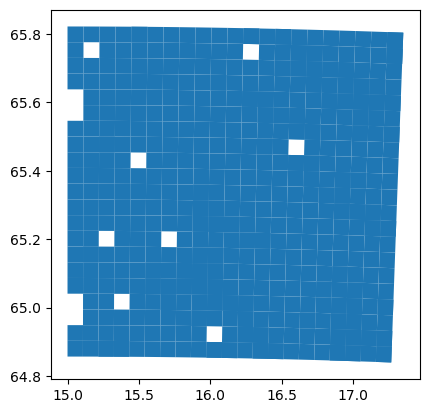

In [6]:
cv0.plot()

In [7]:
print(cv0.shape)

(528, 5)


In [8]:
cv0['date'].unique()

<ArrowExtensionArray>
[ datetime.date(2019, 5, 18),  datetime.date(2022, 11, 8),
 datetime.date(2023, 10, 21)]
Length: 3, dtype: date32[day][pyarrow]

In [9]:
cv0.loc[1,'embeddings'].shape

(768,)

In [10]:
cv0.geometry.area

/tmp/ipykernel_2923593/2272870331.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cv0.geometry.area


0      0.005141
1      0.005141
2      0.005141
3      0.005141
4      0.005141
         ...   
523    0.004964
524    0.004964
525    0.004963
526    0.004962
527    0.004961
Length: 528, dtype: float64

In [16]:
# look at v1.5 naip
import glob
naip_dir = 'clay/v1.5_naip/**/**/'
naip_files = glob.glob(os.path.join(naip_dir,'*.parquet'))
print(naip_files)

['clay/v1.5_naip/rgbir_cog/40072/m_4007201_sw_18_060_20211105.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007209_nw_18_060_20211105.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007201_nw_18_060_20211105.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007210_se_18_060_20211105.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007202_sw_18_060_20211105.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007206_sw_18_060_20210926.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007207_ne_18_060_20210926.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007213_ne_18_060_20210926.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007212_ne_18_060_20210904.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007207_sw_18_060_20210926.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007202_se_18_060_20211105.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007217_ne_18_060_20211105.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007202_ne_18_060_20211105.parquet', 'clay/v1.5_naip/rgbir_cog/40072/m_4007205_nw_18_060_20210904.parquet', 'clay

In [17]:
naip_file = naip_files[0]
naip = gpd.read_parquet(naip_file)
naip.head()

,geometry,embeddings
0,"POLYGON ((-73.00162 40.94184, -73.00166 40.940...","[-0.16944696, 0.010019672, 0.21656689, -0.3024..."
1,"POLYGON ((-72.9998 40.94181, -72.99984 40.9404...","[-0.15459591, 0.04628463, 0.23443548, -0.30778..."
2,"POLYGON ((-72.99797 40.94178, -72.99801 40.940...","[-0.034026712, 0.15732616, 0.26095876, -0.3676..."
3,"POLYGON ((-72.99615 40.94174, -72.99619 40.940...","[-0.12836428, 0.035987437, 0.2391015, -0.27302..."
4,"POLYGON ((-72.99432 40.94171, -72.99437 40.940...","[-0.13894823, 0.06859536, 0.28003076, -0.25515..."


<Axes: >

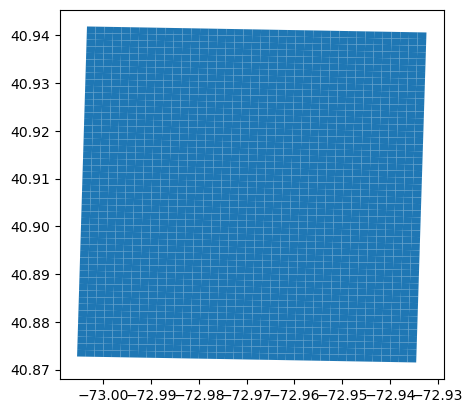

In [18]:
naip.plot()

In [19]:
naip.loc[1,'embeddings'].shape

(1024,)

In [25]:
naip_prj = naip.set_crs('EPSG:3857')
naip_prj = naip_prj.to_crs('EPSG:3857')
naip_prj.geometry.area

0       0.000003
1       0.000003
2       0.000003
3       0.000003
4       0.000003
          ...   
1945    0.000003
1946    0.000003
1947    0.000003
1948    0.000003
1949    0.000003
Length: 1950, dtype: float64

In [28]:
# look at earthgeonome's embeddings
eg_dir = 'earthgenome/'
eg_files = os.listdir(eg_dir)
print(eg_files)
eg_file = os.path.join(eg_dir,eg_files[0])
eg = gpd.read_parquet(eg_file)
eg.head()

['01GEL_2024-01-01_2025-01-01.parquet']


,id,embedding,geometry
0,2256592016843082,"[5.3756223, -2.3068445, 3.3770657, 0.83846265,...",POINT (-175.98275 -44.68955)
1,2256592022306648,"[5.3756223, -2.3068445, 3.3770657, 0.83846265,...",POINT (-175.98073 -44.68811)
2,2256592200298847,"[5.3756223, -2.3068445, 3.3770657, 0.83846265,...",POINT (-175.9787 -44.68955)
3,2256592203708941,"[5.3756223, -2.3068445, 3.3770657, 0.83846265,...",POINT (-175.97668 -44.68811)
4,2256592205538334,"[5.3756223, -2.3068445, 3.3770657, 0.83846265,...",POINT (-175.97466 -44.68955)


<Axes: >

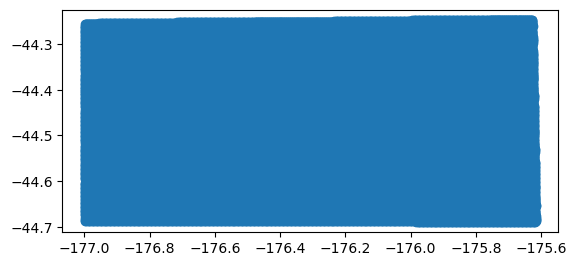

In [29]:
eg.plot()

In [30]:
eg.shape

(104127, 3)

In [32]:
eg.loc[1,'embedding'].shape

(384,)

In [ ]:
eg.geometry # they opted for Point centroids but can read from source.coop that they represent 32px x 32px chips of a MajorTom Grid Cell

0         POINT (-175.98275 -44.68955)
1         POINT (-175.98073 -44.68811)
2          POINT (-175.9787 -44.68955)
3         POINT (-175.97668 -44.68811)
4         POINT (-175.97466 -44.68955)
                      ...             
104122    POINT (-175.64392 -44.24686)
104123     POINT (-175.6399 -44.24686)
104124    POINT (-175.63589 -44.24686)
104125    POINT (-175.63188 -44.24686)
104126    POINT (-175.62786 -44.24686)
Name: geometry, Length: 104127, dtype: geometry

In [ ]:
# check which tiles I'd want for SE Asia (might as well use countries that participated in SERVIR SEA)